# Email multi-class classification

We often face the problem of searching meaningful emails
from thousands of promotional emails. This challenge focuses on creating
a multi-class classifier that can classify an email into four classes based
on the metadata extracted from the email. 

## Overview of the Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
Id,,,,,,,,,,,,,
0,"Thu, 17 Mar 2016 01:57:16 +0000",coursera,org,0,0,multipart/alternative,23,188,0,1,38,136818,0
1,"Fri, 19 Jan 2018 05:20:29 +0000",google,com,0,0,multipart/alternative,1,6,0,0,44,2467,0
2,"Mon, 21 Aug 2017 10:54:50 +0530",iiitd,ac.in,1,0,multipart/mixed,0,1,1,0,78,2809449,2
3,"Fri, 3 Mar 2017 03:46:08 +0000",NaN,NaN,0,0,multipart/alternative,4,43,0,0,61,13775,0
4,"Thu, 8 Jun 2017 03:51:09 +0000 (UTC)",linkedin,com,0,0,multipart/alternative,4,26,0,0,29,22601,1


In [110]:
#Handling missing values


## First intuitive model 

Intuitively, we can think that an organisation will on average send the same type of e-mails. Thus, we can categorize the organisation purpose for sending emails and assign this category to all of the emails the organisation sends.

In [149]:
# Handling missing values 
df.fillna('NA', inplace=True)

# Splitting Data into test and train sets
X = df[['org', 'label']]
y = df['label']
FIM_train_x,FIM_test_x = train_test_split(X, test_size=0.15, random_state=42)
FIM_train_y,FIM_test_y = train_test_split(y, test_size=0.15, random_state=42)

# Computing the length of both sets 
n_train = FIM_train_x.shape[0]
n_test = FIM_test_x.shape[0]

In [150]:
#find all organisations
train_category = list(set(FIM_train_x['org']))
test_category = list(set(FIM_test_x['org']))

# evaluate the class for each organisation 
pred_class=[]
for category in train_category:
    l0=FIM_train_x[FIM_train_x['org']==category]['label'].tolist().count(0)  ##counts the number of mails with label 0
    l1=FIM_train_x[FIM_train_x['org']==category]['label'].tolist().count(1)  ##for this category
    l2=FIM_train_x[FIM_train_x['org']==category]['label'].tolist().count(2)
    l3=FIM_train_x[FIM_train_x['org']==category]['label'].tolist().count(3)
    count = [l0,l1,l2,l3]
    index = count.index(max(count))
    pred_class.append(index) 

However, if the train set doesn't include all organisation names, predictions will be missing for the test set. In this case, we will randomly generate a class.

In [151]:
from random import *

pred_train=[]
pred_test=[]

for org in FIM_train_x['org']:
    pred_train.append(pred_class[train_category.index(org)])
for org in FIM_test_x['org']:
    if org in train_category:
        pred_test.append(pred_class[train_category.index(org)])
    else:
        pred_test.append(randint(0,3))
  

In [135]:
#Calculate Train Accuracy
FIM_train_y.index = list(range(n_train))
FIM_test_y.index = list(range(n_test))

score=[1 if FIM_train_y[i]==pred_train[i] else 0 for i in range(n_train)]
accuracy=sum(score)/n_train
print(accuracy)

0.8924716042429363


In [136]:
score=[1 if FIM_test_y[i]==pred_test[i] else 0 for i in range(n_test)]
accuracy=sum(score)/n_test
print(accuracy)

0.8784574468085107


This model already gives satisfying results. However, we don't want our predictions to use only one feature, and to be partly random. The following sections will show how the data can be processed and used with different Machine Learning algorithms. 

## Feature Engineering

### Feature selection

Some features are irrelevant. For instance, the complete date doesn’t seem to be
significant so only the hour will be used and encoded. Indeed, the hour can bring out spam-emails that are sent at the same hour every day, or at unsuitable moment of the day.
All other features should give valuable information for labelisation.

### Data Preprocessing


The data is provided by https://www.kaggle.com/c/2el1730-machinelearning as part of a competition. Thus, the test target is not given and I decided to split the train set into two sets.

In [240]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [242]:
X = df.drop(['label'], axis = 1)
y = df['label']
n = len(data)

1. Encoding clyclic ordinal attribute

In [243]:
X['date'] = [pd.to_datetime(X['date'][i].split("+")[0]).hour for i in range(n)]

hours_in_a_day = 24

X['sin_time'] = np.sin(2*np.pi*X['date']/24)
X['cos_time'] = np.cos(2*np.pi*X['date']/24)
X.drop(['date'], axis = 1)

#X[['sin_time', 'cos_time']].head(3)

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,sin_time,cos_time
Id,,,,,,,,,,,,,
0,coursera,org,0,0,multipart/alternative,23,188,0,1,38,136818,0.258819,0.965926
1,google,com,0,0,multipart/alternative,1,6,0,0,44,2467,0.965926,0.258819
2,iiitd,ac.in,1,0,multipart/mixed,0,1,1,0,78,2809449,0.500000,-0.866025
3,NaN,NaN,0,0,multipart/alternative,4,43,0,0,61,13775,0.707107,0.707107
4,linkedin,com,0,0,multipart/alternative,4,26,0,0,29,22601,0.707107,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25061,amazon,in,0,0,multipart/alternative,6,51,0,0,97,25910,0.965926,-0.258819
25062,orders,apple.com,0,0,multipart/alternative,3,58,0,0,39,124209,-0.258819,0.965926
25063,usebackpack,com,0,0,multipart/alternative,4,17,0,0,35,29708,0.707107,-0.707107


2. Encoding categorical features and applying LDA to cut the sparse matrices (Dimensionality Reduction)

In [244]:
org = pd.get_dummies(X['org'],prefix = ['org'])
X = X.drop(columns=['org'])

clf = LDA()
clf.fit(org ,y)
org = clf.transform(org)
a,c = np.shape(org)

for i in range(c):
    X['org'+str(i)] = org[:,i]

In [245]:
tld = pd.get_dummies(X['tld'],prefix = ['tld'])
X = X.drop(columns=['tld'])

clf = LDA()
clf.fit(tld ,y)
tld = clf.transform(tld)
a,c = np.shape(tld)

for i in range(c):
    X['tld'+str(i)] = tld[:,i]

In [246]:
m_type = pd.get_dummies(X['mail_type'],prefix = ['m_type'])
X = X.drop(columns=['mail_type'])

clf = LDA()
clf.fit(m_type ,y)
m_type = clf.transform(m_type)
a,c = np.shape(m_type)

for i in range(c):
    X['m_type'+str(i)] = m_type[:,i]

In [247]:
X.head(3)

,date,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,sin_time,cos_time,org0,org1,org2,tld0,tld1,tld2,m_type0,m_type1,m_type2
Id,,,,,,,,,,,,,,,,,,,,
0,1,0,0,23,188,0,1,38,136818,0.258819,0.965926,-0.801545,1.895643,-2.045782,-1.419579,-0.260338,1.247686,0.195814,-0.478418,-0.256804
1,5,0,0,1,6,0,0,44,2467,0.965926,0.258819,-0.801545,1.895643,-2.045782,-1.295806,0.608446,-0.375502,0.195814,-0.478418,-0.256804
2,10,1,0,0,1,1,0,78,2809449,0.500000,-0.866025,7.232727,-2.295376,0.292490,5.783301,-0.066886,-0.060440,1.633915,1.305786,1.768940


3. Normalisation 

In [248]:
scaler = StandardScaler()
scaler.fit(X)

data = pd.DataFrame(scaler.transform(X))
data.columns = X.columns

data.head()

,date,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,sin_time,cos_time,org0,org1,org2,tld0,tld1,tld2,m_type0,m_type1,m_type2
0,-1.690513,-0.118625,-0.037925,1.491396,2.370808,-0.758413,2.752351,-0.528883,0.000796,0.328869,1.728135,-0.208147,0.624548,-1.264235,-0.514665,-0.220178,1.153191,0.186675,-0.467265,-0.255215
1,-1.020848,-0.118625,-0.037925,-0.639912,-0.563191,-0.758413,-0.363326,-0.352320,-0.092771,1.341868,0.692437,-0.208147,0.624548,-1.264235,-0.469792,0.514587,-0.347063,0.186675,-0.467265,-0.255215
2,-0.183767,0.167862,-0.037925,-0.736789,-0.643796,1.318543,-0.363326,0.648202,1.862118,0.674384,-0.955120,1.878210,-0.756246,0.180751,2.096722,-0.056568,-0.055863,1.557658,1.275346,1.757990
3,-1.355681,-0.118625,-0.037925,-0.349279,0.033281,-0.758413,-0.363326,0.147941,-0.084896,0.971085,1.349043,-0.088380,0.547091,-1.124845,-0.338943,0.836978,2.277956,0.186675,-0.467265,-0.255215
4,-1.355681,-0.118625,-0.037925,-0.349279,-0.240774,-0.758413,-0.363326,-0.793727,-0.078749,0.971085,1.349043,-1.375225,-2.081134,0.067002,-0.469792,0.514587,-0.347063,0.186675,-0.467265,-0.255215


# Estimators 

In [249]:
# Splitting the dataset into train and test sets
train_x, test_x, train_y, test_y = train_test_split(data, y, test_size=0.20, random_state=42)

n_train = train_x.shape[0]
n_test = test_x.shape[0]

Model tuning is tricky. We can either try to guess the good parameters, which can be easy sometimes, or we can search the parameters. For that we used GridSearchCV from sklearn. With that, we can search the best parameters using a grid and cross validation. For each models, a grid search has been done to find the best hyper parameters.

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

best_D = 15
#max_score = 0.946987554797872

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = best_D),n_estimators=300)
scores = cross_val_score(clf,train_x,train_y,cv = 5,scoring=make_scorer(accuracy_score))
scores = sum(scores)/len(scores)
print(scores)

0.946987554797872


In [258]:
test_scores = cross_val_score(clf, test_x,test_y,cv = 5,scoring=make_scorer(accuracy_score))
test_scores = sum(test_scores)/len(test_scores)
print(test_scores)

0.9339862647586183


In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = [{ 
'C': [3,100,1000, 10000],
'gamma': [0.01,0.05,0.1]}]

clf = GridSearchCV(SVC(), parameters, scoring='accuracy')
clf.fit(train_x, train_y)

print(clf.best_params_)

{'C': 100, 'gamma': 0.05}


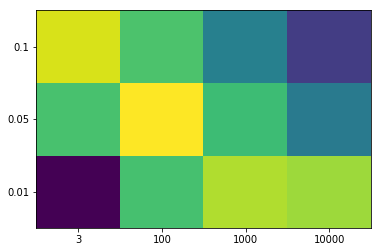

In [270]:
import matplotlib.pyplot as plt
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_gamma', columns='param_C')

plt.pcolor(pvt)
plt.yticks(np.arange(0.5, len(pvt.index), 1), pvt.index)
plt.xticks(np.arange(0.5, len(pvt.columns), 1), pvt.columns)
plt.show()

In [273]:
from sklearn.multiclass import OneVsRestClassifier

best_C = 100
best_gamma = 0.05

clf_svm = OneVsRestClassifier(SVC(C=best_C,gamma = best_gamma, kernel='rbf'))  
scores = cross_val_score(clf_svm,train_x,train_y,cv = 5,scoring=make_scorer(accuracy_score))
scores = sum(scores)/len(scores)
print(scores)

0.9282366882594063


In [274]:
test_scores = cross_val_score(clf, test_x,test_y,cv = 5,scoring=make_scorer(accuracy_score))
test_scores = sum(test_scores)/len(test_scores)
print(test_scores)

0.9190299361396846


The final score is pretty satisfying. However, categorical features like organisation names can change from a data set to an other. In the case when the test set has a complete different set of organisations, the model won't be fitted to make good predictions on this new data.
For further improvements, we can try to remove these features from our data set, so that the results don't depend on it.